## 0 -Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1- Read Data

In [2]:
df = pd.read_csv('data_clean.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Las clases están desbalanceadas, utilizaré la técnica de Oversampling

## 2- Feature Selection
- X and y
- Split into train-test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Exited', axis =1)
y = df["Exited"]
X.shape, y.shape

((10000, 10), (10000,))

### SMOTE over-sampling

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
smote = SMOTE()
Xsmote, ysmote = smote.fit_resample(X, y)

In [10]:
ysmote.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xsmote, ysmote, test_size = 0.3, random_state=42)

In [12]:
X_train.shape, y_train.shape

((11148, 10), (11148,))

### 3- Build Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
mlp = MLPClassifier().fit(X_train, y_train)

### Stacking Model

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
estimators = [
    ('knn', knn),
    ('svc', svc),
    ('dt', dt),
    ('rf', rf),
    ('mlp', mlp)
]

In [18]:
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('mlp', MLPClassifier())],
                   final_estimator=LogisticRegression())

In [19]:
prediction = model.predict(X_test)

### Evaluation

In [22]:
classes = ['Cliente', 'Abandono']

In [20]:
from sklearn import metrics

In [23]:
#Classification Report
print(metrics.classification_report(y_test, prediction, target_names = classes))

              precision    recall  f1-score   support

     Cliente       0.87      0.86      0.87      2426
    Abandono       0.86      0.87      0.87      2352

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



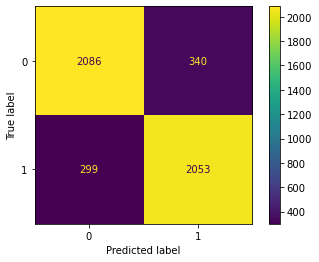

In [24]:
metrics.plot_confusion_matrix(model, X_test, y_test);

**Probaremos Normalizando los datos**

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(Xsmote)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, ysmote, test_size = 0.3, random_state=42)

In [29]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
mlp = MLPClassifier().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
estimators = [
    ('knn', knn),
    ('svc', svc),
    ('dt', dt),
    ('rf', rf),
    ('mlp', mlp)
]

model2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

StackingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('mlp', MLPClassifier())],
                   final_estimator=LogisticRegression())

In [31]:
prediction2 = model2.predict(X_test)

In [32]:
#Classification Report
print(metrics.classification_report(y_test, prediction2, target_names = classes))

              precision    recall  f1-score   support

     Cliente       0.87      0.84      0.85      2426
    Abandono       0.84      0.87      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



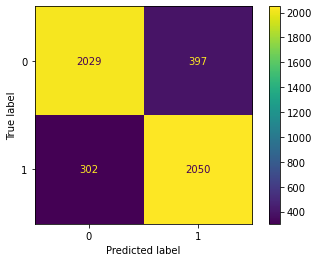

In [33]:
metrics.plot_confusion_matrix(model2, X_test, y_test);